# Real reyes data

**In brief**:

* 854 neurons
* 0.07% of `S1FL` region
* Layers 3 to 6
* Are all the cells from the 30K cells microcircuit, the `hex0` group?


**Questions**: 

* why do the spike waveforms look so poor?
    * background noise produced by neighboring cells and recorded by the probe's contact likely distorts the true spike waveform. Can we plot the raw spike waveform extracted from the change in membrane potential simulated by NEURON?
* what criterion is used to decide when a spike is timestamped? 
* a spike is recorded by multiple nearby channels? What criterion is used to decide from which channel one should extract the "final" waveform?
    * likely the closest channel, where the spike amplitude should be maxinmal
* the simulation produces 30 trace and spike files ("pieces") that contain activity for 851 neurons. How were these neurons chosen?
* How well can we estimate the ground truth neurons known locations from their spike train and the recorded traces with the "center of mass" method?

**Notes**:

* Even one 4 sec piece of simulation is too large to be loaded at runtime in memory with report.get() on a compute node in interactive mode (with --mem=0). The associated lfp.h5 is 1.2TB.

# Setup

Activate `npx_10m_384ch_unit_classes` venv

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import spikeinterface.extractors as se
import os
import spikeinterface as si
import spikeinterface.preprocessing as spre
import spikeinterface.widgets as sw

# SET PROJECT PATH
# PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/spike-sorting"
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj68/home/laquitai/cns_2023_on_git/"

os.chdir(PROJ_PATH)

# set channel
CHANNEL_ID = 50

# SETUP REAL REYES EXPERIMENT
# file 05 is for spontaneous activity
DATA_PATH = "/gpfs/bbp.cscs.ch/project/proj68/scratch/imbeni/sorting/dataset/reyes/Exp26/S001E026F005_Raw.raw"

# Check raw lfp traces

Describe data

In [111]:
# load
reyes_recording = se.read_mcsraw(DATA_PATH)

# preprocess (sampling frequency is 20,000 Hz)
reyes_recording_pre = spre.bandpass_filter(reyes_recording, freq_min=300, freq_max=3000)

# reyes_recording_pre = si.preprocessing.whiten(reyes_recording_pre)

trace = spre.common_reference(
    reyes_recording_pre, reference="global", operator="median"
)

In [5]:
# inspect object
print(f"\ntrace type: \n {type(trace)}\n")
print(f"trace attributes: \n")
print(dir(trace))

# inspect the raw lfp recording
duration = trace.get_total_duration()
print(f"trace recording duration: {duration} secs\n")


trace type: 
 <class 'spikeinterface.preprocessing.common_reference.CommonReferenceRecording'>

trace attributes: 

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_annotations', '_channel_slice', '_check_segment_index', '_dtype', '_extra_metadata_from_folder', '_extra_metadata_to_folder', '_features', '_frame_slice', '_get_file_path', '_kwargs', '_main_annotations', '_main_features', '_main_ids', '_main_properties', '_parent_recording', '_preferred_mp_context', '_properties', '_recording_segments', '_remove_channels', '_sampling_frequency', '_save', '_select_segments', 'add_recording_segment', 'annotate', 'binary_compatible_with', 'channel_ids', 'channel_slice', 'check_if_dumpable', 'clear_c

Check realism

In [112]:
traces = trace.get_traces()

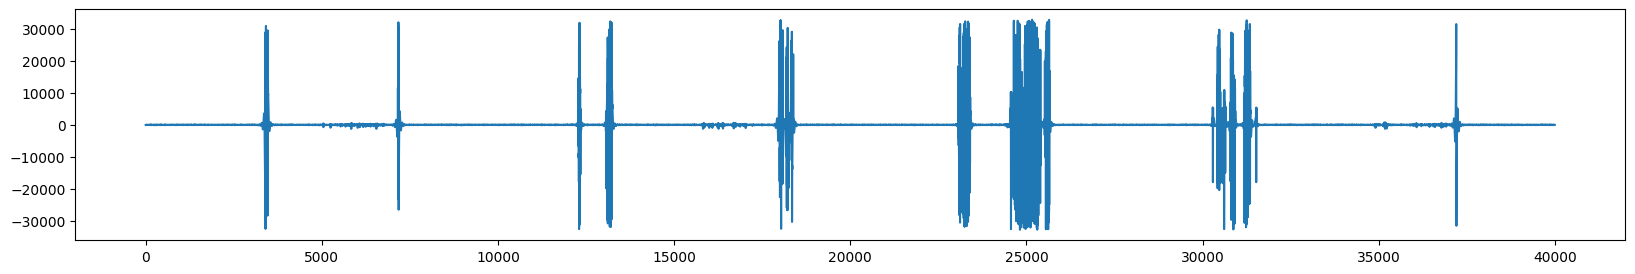

In [122]:
plt.figure(figsize=(20, 3))
plt.plot(traces[0:40000, 10])
# plt.plot(traces[0:4000, 10]);
# plt.ylim([-0.5, 0.5]);
# plt.ylim([-7000, 5000]);

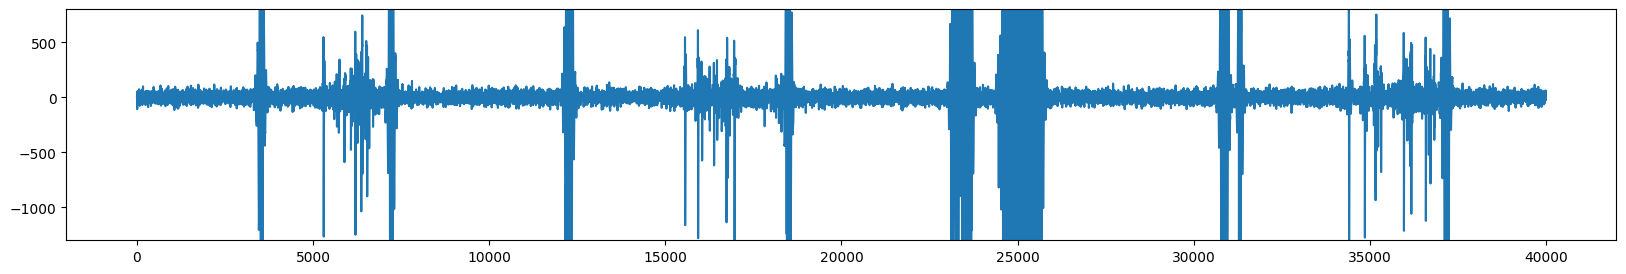

In [115]:
plt.figure(figsize=(20, 3))
plt.plot(traces[0:40000, 2])
plt.ylim([-1300, 800])

We can compare it at scale to `Hagen et al., (2015), Journal of Neuroscience Methods` traces in the mouse's visual cortex.


# References

(1) https://probeinterface.readthedocs.io/en/stable/examples/ex_05_device_channel_indices.html 

(2) https://spikeinterface.readthedocs.io/en/latest/modules/core/plot_4_waveform_extractor.html 